# Pupil Synth Demo
This is the notebook that demonstrates how to generate synthetic pupil plate data. The other notebook in the repo is more experimental and may be filled with junk. This notebook should be up-to-date.

In [1]:
import numpy as np
from numpy.lib import pad
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.gca().set_aspect('equal')
rcParams['figure.figsize'] = [10., 8.]

from src.source import CircularPupil, PointSource, EllipticalPupil
from src.pupil_plate_image import PupilPlateImage

In [2]:
inner_radius, outer_radius, counts = 100, 200, 600
cp = CircularPupil(inner_radius, outer_radius, counts)

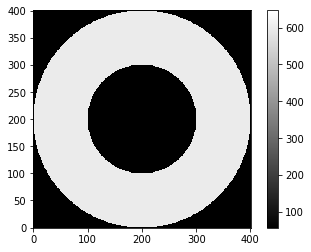

In [3]:
# show the decal
m, s = np.mean(cp.decal), np.std(cp.decal)
plt.imshow(cp.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [4]:
# make pupil plate image with default noise and add the Circular Pupil
plate_image = PupilPlateImage()
cx = random.randint(400, 3696)
cy = random.randint(400, 3696)
plate_image.add_source(cp, cx, cy)

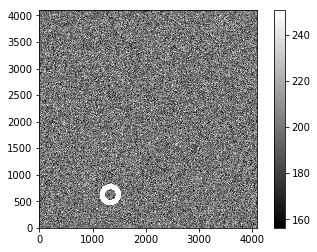

In [6]:
# you must call render() if you want to generate an image
image = plate_image.render()
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [7]:
side_length = 64
shape = (side_length, side_length)
pp3 = PupilPlateImage(shape)


# add a PointSource
radius = 16
counts = 1.618*side_length
ps = PointSource(radius, counts)

psx = 40
psy = 40
pp3.add_source(ps, psx, psy)

# add a CircularPupil
inner_radius = 3
outer_radius = 16
cp1 = CircularPupil(inner_radius, outer_radius, counts,
                  center_vector=(1,1))

cpx = 32
cpy = 24
pp3.add_source(cp1, cpx, cpy)

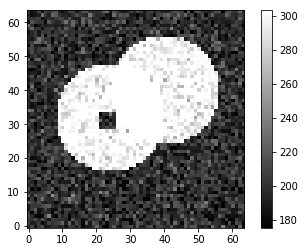

In [8]:
image = pp3.render()
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s,
           origin='lower')
plt.colorbar();

In [9]:
from src.source import EllipticalPupil
import numpy as np
import matplotlib.pyplot as plt

outer_a = 200
outer_b = 180
outer_phi = np.pi/3.

inner_a = 100
inner_b = 90
inner_phi = np.pi/3.
counts = 100
center_vector = (21, 34)

ep0 = EllipticalPupil(inner_a, inner_b, 0., outer_a, outer_b, 0., counts)

# add rotation
ep1 = EllipticalPupil(inner_a, inner_b, inner_phi, outer_a, outer_b, outer_phi,
                      counts)
# add center_vector
ep2 = EllipticalPupil(inner_a, inner_b, inner_phi, outer_a, outer_b, outer_phi,
                      counts, center_vector)

In [10]:
#data = ep1.d
#m, s = np.mean(data), np.std(data)
#plt.imshow(data, interpolation='nearest', cmap='gray',
#           vmin=m-s, vmax=m+s, origin='lower')
#plt.colorbar();

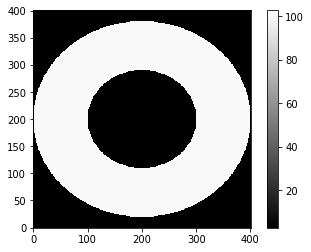

In [11]:
# show the decal
m, s = np.mean(ep0.decal), np.std(ep0.decal)
plt.imshow(ep0.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s,
           origin='lower')
plt.colorbar();

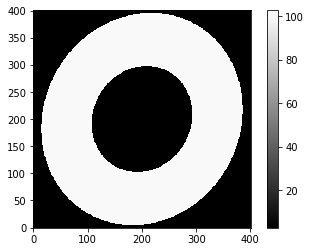

In [12]:
# show the decal
m, s = np.mean(ep1.decal), np.std(ep1.decal)
plt.imshow(ep1.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s,
           origin='lower')
plt.colorbar();

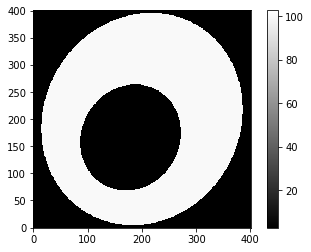

In [13]:
m, s = np.mean(ep2.decal), np.std(ep2.decal)
plt.imshow(ep2.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# Add the EllipticPupils to the plate image

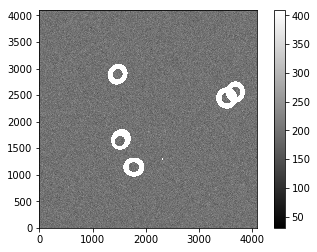

In [19]:
for s in [cp, cp1, ps, ep0, ep1, ep2, epBA]:
    cx = random.randint(400, 3696)
    cy = random.randint(400, 3696)
    plate_image.add_source(s, cx, cy)

image = plate_image.render()
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();


# Inspect Cutout generation

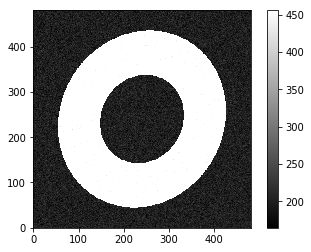

In [20]:
cutout = plate_image.cutout_for_source(ep1)

m, s = np.mean(cutout), np.std(cutout)
plt.imshow(cutout, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();